# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [108]:
import pandas as pd
!pip install xlrd

You should consider upgrading via the '/Users/ayukakawakami/.pyenv/versions/3.10.3/bin/python3.10 -m pip install --upgrade pip' command.


## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [109]:
pd.read_excel("KyotoFullFlower7.xls")
df = pd.read_excel("KyotoFullFlower7.xls")
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [110]:
pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [111]:
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [112]:
pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df = df.replace('-', 'NaN')

## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [113]:
#Change the column names without spaces
df = df.rename(columns={"Full-flowering date (DOY)": "Full_flowering_date_DOY", "Full-flowering date": "Full_flowering_date", "Source code": "Source_code", "Data type code": "Data_type_code", "Reference Name":"Reference_Name" })

In [114]:
df.Reference_Name.mode()

0    NaN
Name: Reference_Name, dtype: object

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [115]:
df=df[df.Full_flowering_date_DOY.notnull()]

In [116]:
df.head()

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU


## 6.5 Confirm you now have 827 rows

In [117]:
len(df)

827

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

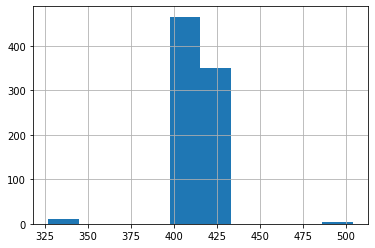

In [118]:
df.Full_flowering_date.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

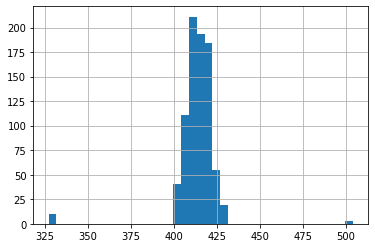

In [119]:
df.Full_flowering_date.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [120]:
df.Full_flowering_date.mean().round()

414.0

In [121]:
len(df.Full_flowering_date)

827

In [122]:
#Not sure how to show those tow in one line of code

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [209]:
df.query("AD < 1900").Full_flowering_date_DOY.mean()

105.20728291316527

## 11. How about after 1900?

In [210]:
df.query("AD > 1900").Full_flowering_date_DOY.mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [125]:
len(df.Data_type_code == 4)

827

## 13. Display the rows where our data was from a title in Japanese poetry

In [126]:
df[df.Data_type_code == 4]

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

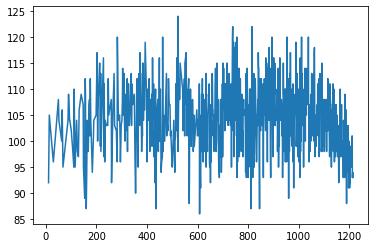

In [127]:
df.Full_flowering_date_DOY.plot(kind='line')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [129]:
df.rolling(10, on='AD', min_periods=5)['Full_flowering_date_DOY'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full_flowering_date_DOY, dtype: float64

In [136]:
rolling_date = df.rolling(20, on='AD', min_periods=5)['Full_flowering_date_DOY'].mean()

<AxesSubplot:>

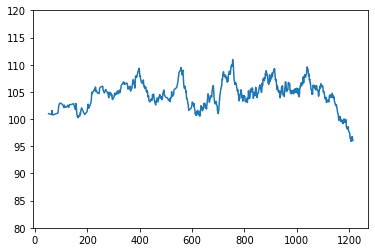

In [139]:
rolling_date.plot(kind='line', ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [170]:
# Convert it to datetime
pd.to_datetime(df.Full_flowering_date, format="%m%d", errors="coerce")

11     1900-04-01
14     1900-04-15
30     1900-04-06
50     1900-04-18
52     1900-04-14
          ...    
1210   1900-04-09
1211   1900-04-10
1212   1900-04-03
1213   1900-04-04
1214   1900-04-03
Name: Full_flowering_date, Length: 827, dtype: datetime64[ns]

In [172]:
df['date_column'] = pd.to_datetime(df.Full_flowering_date, format="%m%d", errors="coerce")

In [177]:
df.date_column.dt.month

11      4
14      4
30      4
50      4
52      4
       ..
1210    4
1211    4
1212    4
1213    4
1214    4
Name: date_column, Length: 827, dtype: int64

In [178]:
df.date_column.dt.strftime("%B")

11      April
14      April
30      April
50      April
52      April
        ...  
1210    April
1211    April
1212    April
1213    April
1214    April
Name: date_column, Length: 827, dtype: object

In [181]:
df['month'] = df.date_column.dt.strftime("%B")
df.month

11      April
14      April
30      April
50      April
52      April
        ...  
1210    April
1211    April
1212    April
1213    April
1214    April
Name: month, Length: 827, dtype: object

## 17. Using your new column, how many blossomings happened in each month?

In [184]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:>

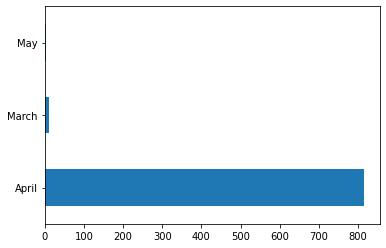

In [194]:
df.month.value_counts().plot.barh()

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [198]:
df['day_of_month'] = df.date_column.dt.strftime("%-d")


In [199]:
df.day_of_month

11       1
14      15
30       6
50      18
52      14
        ..
1210     9
1211    10
1212     3
1213     4
1214     3
Name: day_of_month, Length: 827, dtype: object

## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [203]:
df['date'] = df.date_column.dt.strftime("%B %-d")

In [204]:
df.date

11       April 1
14      April 15
30       April 6
50      April 18
52      April 14
          ...   
1210     April 9
1211    April 10
1212     April 3
1213     April 4
1214     April 3
Name: date, Length: 827, dtype: object

## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

In [206]:
df['day_of_the_week'] = df.date_column.dt.strftime("%A")

In [207]:
df.day_of_the_week

11         Sunday
14         Sunday
30         Friday
50      Wednesday
52       Saturday
          ...    
1210       Monday
1211      Tuesday
1212      Tuesday
1213    Wednesday
1214      Tuesday
Name: day_of_the_week, Length: 827, dtype: object

In [208]:
df.day_of_the_week.mode()
#no it does not take the weekends off!

0    Sunday
Name: day_of_the_week, dtype: object

# YOU ARE DONE.

And **incredible.**